# - Import data into Python environment.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"Z:\simp\PYTHON\comcast\Comcast_telecom_complaints_data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


# - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

Monthly

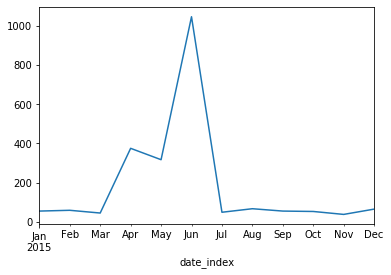

In [84]:
df["date_index"] = df["Date_month_year"] + " " + df["Time"]
df["date_index"] = pd.to_datetime(df["date_index"])
df["Date_month_year"] = pd.to_datetime(df["Date_month_year"])
df = df.set_index(df["date_index"])
df.groupby(pd.Grouper(freq="M")).size().plot()

Daily

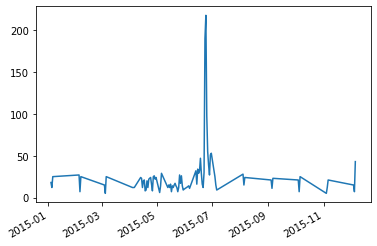

In [85]:
df["Date_month_year"].value_counts().plot()

# - Provide a table with the frequency of complaint types.

In [121]:
import re 
Internet=sum(df['Customer Complaint'].str.count("internet", re.I))
Network=sum(df['Customer Complaint'].str.count("network", re.I))
Billing=sum(df['Customer Complaint'].str.count("bill", re.I))
Email=sum(df['Customer Complaint'].str.count("email", re.I))
Charges=sum(df['Customer Complaint'].str.count("charge", re.I))
Other=len(df)-dfn1['Charges issues']-dfn1['Email issues']-dfn1['Billing issues']-dfn1['Internet issues']
issues = {'Complaint types': ['Internet','Network','Billing','Email','Charges','Other'],
        'Count': [Internet,Network,Billing,Email,Charges,Other]
        }
dfd = pd.DataFrame(issues, columns = ['Complaint types','Count'])
dfd

,Complaint types,Count
0,Internet,536
1,Network,2
2,Billing,384
3,Email,16
4,Charges,140
5,Other,1146


# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [122]:
dfd.sort_values(by='Count',ascending=False).head(2).tail(1)

,Complaint types,Count
0,Internet,536


# - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [124]:
df["newStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in df["Status"]]
dfx = df.groupby(['State', 'newStatus'])['State'].count().reset_index(name='Value')
dfx.head()

,State,newStatus,Value
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6


# - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

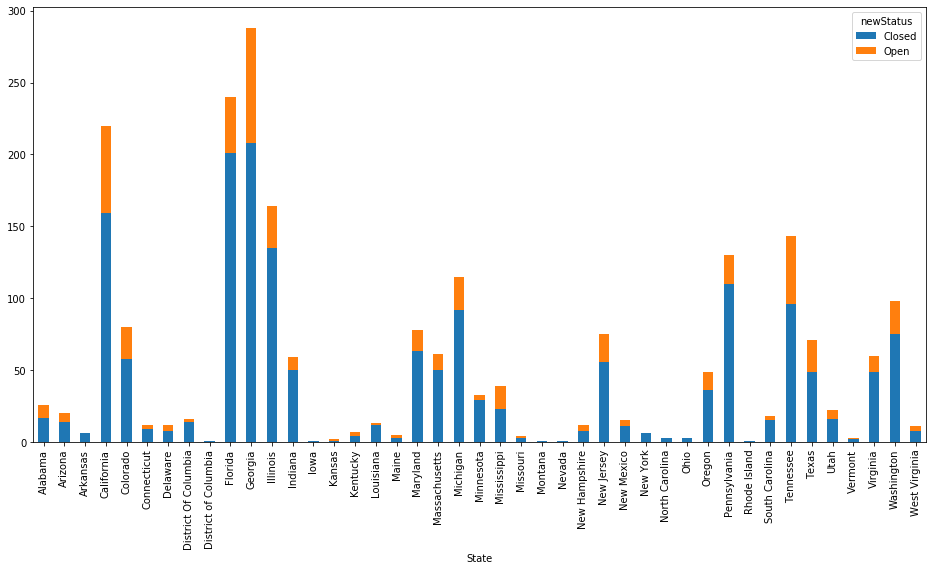

In [89]:
pivot_df = dfx.pivot(index='State', columns='newStatus', values='Value')
pivot_df.loc[:,['Closed','Open']].plot.bar(stacked=True,figsize=(16,8))

# Which state has the maximum complaints

In [90]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename({0: "Count"}, axis=1).head(1)

,State,Count
0,Georgia,288


# Which state has the highest percentage of unresolved complaints

In [91]:
open=dfx[dfx['newStatus']=='Open']
closed=dfx[dfx['newStatus']=='Closed']
open=open.rename(columns={'Value':'Open'})
closed=closed.rename(columns={'Value':'Closed'})
total=pd.merge(open,closed,on='State')
total['Count']=total['Open']+total['Closed']
total=total.sort_values(by='Count',ascending=False)
total['Percentage of unresolved']=(total['Open']/total['Count'])*100
total.sort_values(by='Percentage of unresolved',ascending=False).head(1)

,State,newStatus_x,Open,newStatus_y,Closed,Count,Percentage of unresolved
11,Kansas,Open,1,Closed,1,2,50.0


# - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [126]:
complaints= df.groupby(['Received Via', 'newStatus'])['State'].count().reset_index(name='Value')
complaints_open=complaints[complaints['newStatus']=='Open']
complaints_closed=complaints[complaints['newStatus']=='Closed']
complaints_total=pd.merge(complaints_closed,complaints_open,on='Received Via')
complaints_total=complaints_total.rename(columns={'Value_x':'Closed','Value_y':'Open'})
complaints_total['Total_count']=complaints_total['Closed']+complaints_total['Open']
complaints_total.head()
complaints_total['Resolved %']=(complaints_total['Closed']/complaints_total['Total_count'])*100
complaints_total.head()

,Received Via,newStatus_x,Closed,newStatus_y,Open,Total_count,Resolved %
0,Customer Care Call,Closed,864,Open,255,1119,77.211796
1,Internet,Closed,843,Open,262,1105,76.289593
